In [1]:
# Libraries and modules
import pandas as pd 
import re
from rapidfuzz import process, fuzz
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# Read December - February data
dec_feb_payments = pd.read_csv(r"C:\Users\user\Desktop\SHA Payments\power_query_extracts\sha_payments_dec_feb.csv")
dec_feb_payments['Provider'] = dec_feb_payments['Provider'].apply(lambda x: x.upper())
# Convert dec payments to float
dec_feb_payments['03-Dec'] = pd.to_numeric(dec_feb_payments['03-Dec'].str.replace(',', ''),
                                           downcast='float')
print(dec_feb_payments.info())
                                        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2588 entries, 0 to 2587
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provider  2588 non-null   object 
 1   03-Dec    1103 non-null   float64
 2   05-Dec    733 non-null    float64
 3   11-Dec    1890 non-null   float64
 4   18-Dec    1930 non-null   float64
 5   23-Dec    1942 non-null   float64
 6   09-Jan    2181 non-null   float64
 7   30-Jan    878 non-null    float64
 8   03-Feb    2207 non-null   float64
dtypes: float64(8), object(1)
memory usage: 182.1+ KB
None


In [3]:
# Read April data
april = pd.read_csv(r"C:\Users\user\Desktop\SHA Payments\power_query_extracts\sha_paid_facilities_april_2025.csv")
april.head()

,Provider,Amount
0,3rd Park Hospital Limited,"13,440.00"
1,A.I.C BETHLEHEM HOUSE OF BREAD DISPENSARY,"131,899.59"
2,A.I.C BETHLEHEM HOUSE OF BREAD DISPENSARY,"325,424.63"
3,A.I.C KAPSOWAR MISSION HOSPITAL,"787,040.00"
4,A.I.C KAPSOWAR MISSION HOSPITAL,1715480


In [4]:
# Regularize provider name case
april['Provider'] = april['Provider'].str.upper()
# Convert amount to float
april['Amount'] = pd.to_numeric(april['Amount'].apply(lambda x: x.replace(',', '')))
april.head()

,Provider,Amount
0,3RD PARK HOSPITAL LIMITED,13440.00
1,A.I.C BETHLEHEM HOUSE OF BREAD DISPENSARY,131899.59
2,A.I.C BETHLEHEM HOUSE OF BREAD DISPENSARY,325424.63
3,A.I.C KAPSOWAR MISSION HOSPITAL,787040.00
4,A.I.C KAPSOWAR MISSION HOSPITAL,1715480.00


In [5]:
# Check info
april.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19216 entries, 0 to 19215
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provider  19216 non-null  object 
 1   Amount    19216 non-null  float64
dtypes: float64(1), object(1)
memory usage: 300.4+ KB


In [6]:
# Aggregate multiple payments
print("Multiple payments:", april['Provider'].duplicated().sum())
april_payments = april.groupby('Provider')['Amount'].sum().reset_index()
print("Aggregated:", len(april_payments))
april_payments.head()

Multiple payments: 14071
Aggregated: 5145


,Provider,Amount
0,3RD PARK HOSPITAL LIMITED,13440.00
1,A.I.C BETHLEHEM HOUSE OF BREAD DISPENSARY,457324.22
2,A.I.C KAPSOWAR MISSION HOSPITAL,16631260.00
3,A.I.C LOKORI HEALTH CENTRE,61489.97
4,A.I.C MULANGO HEALTH CENTRE KITUI,3535.91


In [7]:
# Read May data
may = pd.read_csv(r"C:\Users\user\Desktop\SHA Payments\power_query_extracts\sha_paid_facilities_july_2025.csv")
may.head()

,Provider,Amount
0,A.C.K. MASENO HOSPITAL,1895040.00
1,A.C.K. MASENO HOSPITAL,1051680.00
2,A.I.C GITHUMU MISSION HOSPITAL,305760.00
3,A.I.C GITHUMU MISSION HOSPITAL,201600.00
4,A.I.C KAPSOWAR MISSION HOSPITAL,1466080.00


In [8]:
# Check info
may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648 entries, 0 to 1647
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provider  1648 non-null   object 
 1   Amount    1648 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.9+ KB


In [9]:
# Regularize provider name case
may['Provider'] = may['Provider'].str.upper()
# Aggregate multiple payments
print("Multiple payments:", may['Provider'].duplicated().sum())
may_payments = may.groupby('Provider')['Amount'].sum().reset_index()
may_payments.head()

Multiple payments: 672


,Provider,Amount
0,A.C.K. MASENO HOSPITAL,2946720.00
1,A.I.C GITHUMU MISSION HOSPITAL,507360.00
2,A.I.C KAPSOWAR MISSION HOSPITAL,2026640.00
3,A.I.C LOKORI HEALTH CENTRE,2240.00
4,AAR HOSPITAL LIMITED MUTHAIGA,6059850.00


In [10]:
# Load June data 
june = pd.read_csv(r"C:\Users\user\Desktop\SHA Payments\power_query_extracts\sha_paid_facilities_june_2025_2.csv")
june.head()

,Provider,Amount
0,1 KENYATTA NATIONAL HOSPITAL,"341,491,903.00"
1,2 MOI TEACHING AND REFERRAL HOSPITAL,"190,679,328.03"
2,3 KENYATTA UNIVERSITY TEACHING REFERRAL AND RE...,"107,856,136.00"
3,4 AIC KIJABE HOSPITAL,"95,063,964.00"
4,5 TENWEK HOSPITAL,"94,286,398.34"


In [11]:
# Check info
june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Provider  3467 non-null   object
 1   Amount    3467 non-null   object
dtypes: object(2)
memory usage: 54.3+ KB


In [12]:
# Remove numbering and regularize case in provider name column
june['Provider'] = june['Provider'].apply(lambda x: ' '.join(x.split()[1:]).upper())
june['Amount'] = pd.to_numeric(june['Amount'].str.replace(",", ''), downcast= 'float')
# Check and aggregate multiple payments
june['Provider'].duplicated().sum()
# Display as float
pd.set_option('display.float_format', '{:.2f}'.format)
june_payments = june.copy()
june_payments.head()


,Provider,Amount
0,KENYATTA NATIONAL HOSPITAL,341491903.00
1,MOI TEACHING AND REFERRAL HOSPITAL,190679328.03
2,KENYATTA UNIVERSITY TEACHING REFERRAL AND RESE...,107856136.00
3,AIC KIJABE HOSPITAL,95063964.00
4,TENWEK HOSPITAL,94286398.34


In [13]:
# Load July data 
july = pd.read_csv(r"C:\Users\user\Desktop\SHA Payments\power_query_extracts\sha_paid_facilities_july_2025.csv")
# Regularize provider name case
july['Provider'] = july['Provider'].str.upper()
# Check multiple paymentns
print("Multiple payments:", july['Provider'].duplicated().sum())
# Aggregare payments
july_payments = july.groupby('Provider')['Amount'].sum().reset_index()
print(july_payments.info())
july_payments.head()

Multiple payments: 672
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provider  976 non-null    object 
 1   Amount    976 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.4+ KB
None


,Provider,Amount
0,A.C.K. MASENO HOSPITAL,2946720.00
1,A.I.C GITHUMU MISSION HOSPITAL,507360.00
2,A.I.C KAPSOWAR MISSION HOSPITAL,2026640.00
3,A.I.C LOKORI HEALTH CENTRE,2240.00
4,AAR HOSPITAL LIMITED MUTHAIGA,6059850.00


In [14]:
# Load July_1 data
july_1 = pd.read_csv(r"C:\Users\user\Desktop\SHA Payments\power_query_extracts\sha_payments_july_2025_1.csv")
# Regularize case
july_1['Provider'] = july_1['Provider'].str.upper()
# Convert amount to float
july_1['Amount'] = pd.to_numeric(july_1['Amount'].str.replace(",", ''), downcast= 'float')
# Check multiple payments
july_1['Provider'].duplicated().sum()
# Group payments
july_1_payments = july_1.groupby('Provider')['Amount'].sum().reset_index()
print(july_1_payments.info())
july_1_payments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2387 entries, 0 to 2386
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provider  2387 non-null   object 
 1   Amount    2387 non-null   float64
dtypes: float64(1), object(1)
memory usage: 37.4+ KB
None


,Provider,Amount
0,A.I.C GITHUMU MISSION HOSPITAL,290000.00
1,AAR HOSPITAL LIMITED MUTHAIGA,2531700.00
2,ABDIWAQO DISPENSARY,90000.00
3,ABIKASHIRO MEDICAL CENTRE LTD,80000.00
4,ABM SPECIALIZED HOSPITAL,42600.00


In [15]:
# Load July 2 data 
july_2 = pd.read_csv(r"C:\Users\user\Desktop\SHA Payments\power_query_extracts\sha_payments_july_2025_2.csv")
# Regularize provider name column
july_2['Provider'] = july_2['Provider'].str.upper()
# Parse amount
july_2['Amount'] = july_2['Amount'].astype(float)
# Check multiple payments
july_2['Provider'].duplicated().sum()
july_2_payments = july_2.copy()
print(july_2.info())
july_2_payments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provider  266 non-null    object 
 1   Amount    266 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB
None


,Provider,Amount
0,ACK DR. PIKE ROPER MEDICAL CENTRE,70000.00
1,AIC KAJIADO HEALTH CENTRE,10000.00
2,ALMAS MEDICAL SERVICES,30000.00
3,AMUMA DISPENSARY,10000.00
4,ASHBURN COMMUNITY NURSING HOME,20000.00


In [16]:
# Load July 3 data
july_3 = pd.read_excel(r"C:\Users\user\Desktop\SHA Payments\power_query_extracts\SHA_PAYMENTS_JULY_2025_3.xlsx")
july_3['Provider'] = july_3['Provider'].str.upper()
# Parse provider name
july_3['Provider'] = july_3['Provider'].apply(lambda x: ' '.join(x.split(' ')[1:]).strip())
# Parse amount
july_3['Amount'] = july_3['Amount'].astype(float)
# Check multiple payments
july_3['Provider'].duplicated().sum()
july_3_payments = july_3.copy()
print(july_3.info())
july_3_payments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provider  333 non-null    object 
 1   Amount    333 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB
None


,Provider,Amount
0,A.I.C GITHUMU MISSION HOSPITAL,537000.00
1,A.I.C KAPSOWAR MISSION HOSPITAL,145600.00
2,AAR HOSPITAL LIMITED MUTHAIGA,212800.00
3,AFRICA INUKA HOSPITAL LTD- MILIMANI,1051119.00
4,AFRICA INUKA HOSPITAL LTD-MADEYA,234800.00


In [17]:
# Load July 4 data 
july_4 = pd.read_csv(r"C:\Users\user\Desktop\SHA Payments\power_query_extracts\SHA_PAYMENTS_JULY_2025_4.csv")
# Regularize provider names
july_4['Provider'] = july_4['Provider'].str.upper()
# Parse amount
july_4['Amount'] = pd.to_numeric(july_4['Amount'].str.replace(',', ''))
# Check multiple payments
july_4['Provider'].duplicated().sum()
# Aggregate payments
july_4_payments = july_4.groupby('Provider')['Amount'].sum().reset_index()
print(july_4_payments.info())
july_4_payments.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provider  398 non-null    object 
 1   Amount    398 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB
None


,Provider,Amount
0,3RD PARK HOSPITAL LIMITED,33600.00
1,A.I.C GITHUMU MISSION HOSPITAL,1062800.00
2,A.I.C KAPSOWAR MISSION HOSPITAL,224000.00
3,AFRICA INUKA HOSPITAL LTD- MILIMANI,1552300.00
4,AFRICA INUKA HOSPITAL LTD-MADEYA,212800.00


In [18]:
# Load August1 data
august_1 = pd.read_csv(r"C:\Users\user\Desktop\SHA Payments\power_query_extracts\sha_payments_august_2025_1.csv")
#Parse Amount
august_1['Amount'] = pd.to_numeric(august_1['Amount'].str.replace(",", ""))
# Check multiple payments
august_1['Amount'].duplicated().sum()
# Aggregate payments
august_1_payments = august_1.groupby('Provider')['Amount'].sum().reset_index()
august_1_payments.head()


,Provider,Amount
0,3RD PARK HOSPITAL LIMITED,131040.00
1,A.I.C GITHUMU MISSION HOSPITAL,6193640.00
2,A.I.C KAPSOWAR MISSION HOSPITAL,1968400.00
3,AAR HOSPITAL LIMITED MUTHAIGA,1259670.00
4,ABAKORE SUB-COUNTY HOSPITAL,134400.00


In [19]:
# Load August2 data
august_2 = pd.read_excel(r"C:\Users\user\Desktop\SHA Payments\power_query_extracts\SHA_PAYMENTS_AUGUST_2025_2.xlsx")
#Parse provider names
august_2['Provider'] = august_2['Provider'].apply(lambda x: ' '.join(x.split()[1:]).strip())
# Check multiple payments
august_2['Amount'].duplicated().sum()
# Aggregate payments
august_2_payments = august_2.groupby('Provider')['Amount'].sum().reset_index()
august_2_payments.head()

,Provider,Amount
0,A.I.C GITHUMU MISSION HOSPITAL,43680.00
1,AAR HOSPITAL LIMITED MUTHAIGA,466480.00
2,ABRAAR HOSPITAL LIMITED,11200.00
3,ABUBAKAR SIDIQ NURSING HOME,44800.00
4,ACELA MEDICAL CENTRE LIMITED,225120.00


In [20]:
# Load KMPDC register
kmpdc_register = pd.read_csv(r"C:\Users\user\Desktop\SHA Payments\facilities\kmpdc_coc_registered_facilities_0907.csv")
kmpdc_register.head()

,facility_name,reg_no,facility_type,level,county,status
0,1ST RONGAI PEDIATRIC CLINIC,015xxx,MEDICAL CLINIC,LEVEL 2,KAJIADO,ACTIVE
1,32 DENTAL STUDIO,006xxx,DENTAL CENTRE,LEVEL 3B,NAIROBI,ACTIVE
2,360 MEDICARE CENTRE CO. LTD,015xxx,NURSING HOME,LEVEL 3A,NYAMIRA,INACTIVE
3,3KR HOSPITAL,GK-xxx,HOSPITAL LEVEL 4,LEVEL 4,NAKURU,ACTIVE
4,3RD PARK HOSPITAL LIMITED,018xxx,SPECIALIZED TREATMENT CENTRE (LEVEL 4B),LEVEL 4B,NAIROBI,ACTIVE


### Merge Datasets

In [21]:
april_may = pd.merge(april_payments, may_payments, on='Provider', how = 'outer',
                     suffixes = ['_april', '_may'])
june_july =  pd.merge(june_payments, july_payments, on='Provider', how = 'outer',
                     suffixes = ['_june', '_july0'])
july_1and2 =  pd.merge(july_1_payments, july_2_payments, on='Provider', how = 'outer',
                     suffixes = ['_july1', '_july2'])
july_3and4 =  pd.merge(july_3_payments, july_4_payments, on='Provider', how = 'outer',
                     suffixes = ['_july3', '_july4'])
august_1and2 =  pd.merge(august_1_payments, august_2_payments, on='Provider', how = 'outer',
                     suffixes = ['_august1', '_august2'])
dec_may = pd.merge(dec_feb_payments, april_may, on='Provider', how='outer')
dec_july = pd.merge(dec_may, june_july, on='Provider', how='outer')
dec_july2 = pd.merge(dec_july, july_1and2, on='Provider', how='outer')
dec_july4 = pd.merge(dec_july2, july_3and4, on='Provider', how='outer')
dec_august = pd.merge(dec_july4, august_1and2, on='Provider', how='outer')

In [22]:
# Rename columns
dec_august.columns = ['provider', '03-dec', '05-dec', '11-dec', '18-dec', '23-dec', 
                      '09-jan','30-jan', '03-feb','april', 'may', 'june', 'july0', 
                      'july1', 'july2', 'july3', 'july4', 'august1', 'august2']
# Fill null values with zero
payments = dec_august.fillna(0)

In [23]:
# Generate closest match for facilities without a match in kmpdc/coc licensed facilities register
def match_sha_kmpdc_fuzz(payments, df_kmpdc):
    """ 
    Check provider names that do not match with KMPDC licensed facilities list (expanded)

    Inputs: merged payments records, kmdpc/coc licensed facilities

    Returns: List with a dictionary of facility names without a match, closest match, score
    """
    facility_list = df_kmpdc['facility_name'].to_list()
    results = []
    for provider in payments['provider'].to_list():
        if provider in facility_list:
            continue
        # Get closest match or none
        match, score, idx = process.extractOne(provider, facility_list,
                                               scorer = fuzz.WRatio)
        results.append({
            'provider': provider,
            'kmpdc_match': match,
            'score': score / 100
        })
    return results

In [24]:
# Create dataframe of unmatched facilities
unmatched = pd.DataFrame(match_sha_kmpdc_fuzz(payments, kmpdc_register)) 

# Save to excel for hand cleaning
unmatched.to_excel(r"C:\Users\user\Desktop\unmatched.xlsx", index = False)

In [25]:
# Load handcleaned facilities list
matched_facilities = pd.read_excel(r"C:\Users\user\Desktop\SHA Payments\csv\match_fuzz_payments_merged.xlsx",
                                    usecols = ['provider', 'kmpdc_match'])
# Merge payments with hand matched facility names
payments_merged = payments.merge(matched_facilities, on ='provider', how ='left' )
# Replace provider column with match where applicable 
payments_matched = payments_merged.copy()
payments_matched['provider'] = payments_matched['kmpdc_match'].where(
                                            ~payments_matched['kmpdc_match'].isna(),
                                            payments_matched['provider'])
# Drop matched column
payments_matched.drop(columns='kmpdc_match', inplace = True)
# Group payments by provider
payments_matched = payments_matched.groupby('provider').sum().reset_index()

In [26]:
# Merge with kmpdc/coc list
payments_processed = payments_matched.merge(kmpdc_register, left_on = 'provider',
                                            right_on = 'facility_name', how = 'left')
# Rearrange columns
payments_processed = payments_processed[['provider', 'reg_no','facility_type', 'level', 
                                        'county', 'status','03-dec', '05-dec', '11-dec', '18-dec', 
                                        '23-dec', '09-jan','30-jan', '03-feb','april', 'may', 'june', 
                                         'july0', 'july1', 'july2', 'july3','july4', 'august1', 
                                         'august2' ]]
# Insert row totals
payments_processed['total'] = payments_processed.iloc[:, 6:].sum(axis = 1)
# Save processed records
payments_processed.to_excel(r"C:\Users\user\Desktop\Fullstack\final_dataset.xlsx", index = False)

In [27]:
# Remove leading and trailing spaces
obj_cols = payments_processed.select_dtypes(include = 'object').columns
payments_processed[obj_cols] = payments_processed[obj_cols].apply(
    lambda x: x.str.strip())

## Analysis

In [28]:
# Payments without matching kmpdc/coc matching dimensions
payments_processed[payments_processed['county'].isna()][['provider', 'total']
                                                        ].reset_index(drop=True)

,provider,total
0,ABQA ANNEX MEDICAL CENTRE LTD,6807889.47
1,AHMADIYA HOSPITAL,9482268.75
2,ALAMAGAN MEDICAL CENTRE LIMITED,1610873.90
3,B & L HEALTHCARE(NAIVASHA),10345619.00
4,B V,976880.00
5,BAXNAN MEDICAL CENTRE,266560.00
6,BIYAMIN NURSING HOME AND ENT SERVICES LIMITED,105280.00
7,BLISS GVS HEALTH CARE LIMITED-MAKOMA PLAZA,1392834.35
8,BLUE CORAL NURSING HOME LIMITED,586880.00
9,CHRISTIAN COMMUNITY SERVICES WANG'URU DISPENSARY,2403707.59


In [29]:
# Total reimbursements Dec - Mid-August
print("Total reimbursements:", payments_processed['total'].sum())

Total reimbursements: 39828547710.17


In [30]:
# Top 10 by earnings, nationally
pd.options.display.float_format = '{:,.2f}'.format
# Top ten earners
top10_national = payments_processed[['provider','facility_type', 'level','total']].sort_values(
    by='total', ascending= False).reset_index(drop = True).head(10)
top10_national

,provider,facility_type,level,total
0,KENYATTA NATIONAL HOSPITAL,NATIONAL TEACHING AND REFERRAL HOSPITAL,LEVEL 6A,"1,329,798,446.00"
1,MOI TEACHING AND REFERRAL HOSPITAL,NATIONAL TEACHING AND REFERRAL HOSPITAL,LEVEL 6A,"1,045,749,887.03"
2,KENYATTA UNIVERSITY TEACHING REFERRAL AND RESE...,NATIONAL TEACHING AND REFERRAL HOSPITAL,LEVEL 6A,"753,682,487.02"
3,RIFT VALLEY PROVINCIAL GENERAL HOSPITAL NAKURU,HOSPITAL LEVEL 5,LEVEL 5,"584,118,566.00"
4,JARAMOGI OGINGA ODINGA TEACHING AND REFERRAL H...,NATIONAL TEACHING AND REFERRAL HOSPITAL,LEVEL 6A,"560,126,696.00"
5,AIC KIJABE HOSPITAL,FAITH BASED LEVEL 5 HOSPITAL,LEVEL 5,"530,732,791.00"
6,THE AGA KHAN UNIVERSITY HOSPITAL NAIROBI,SPECIALIZED TERTIARY REFERRAL HOSPITAL,LEVEL 6B,"410,693,083.68"
7,TENWEK HOSPITAL,FAITH BASED LEVEL 5 HOSPITAL,LEVEL 5,"396,820,678.34"
8,TEXAS CANCER CENTRE NAIROBI WEST,HOSPITAL LEVEL 4,LEVEL 4,"388,798,834.00"
9,NAIROBI WEST HOSPITAL,SPECIALIZED TERTIARY REFERRAL HOSPITAL,LEVEL 6B,"378,339,192.53"


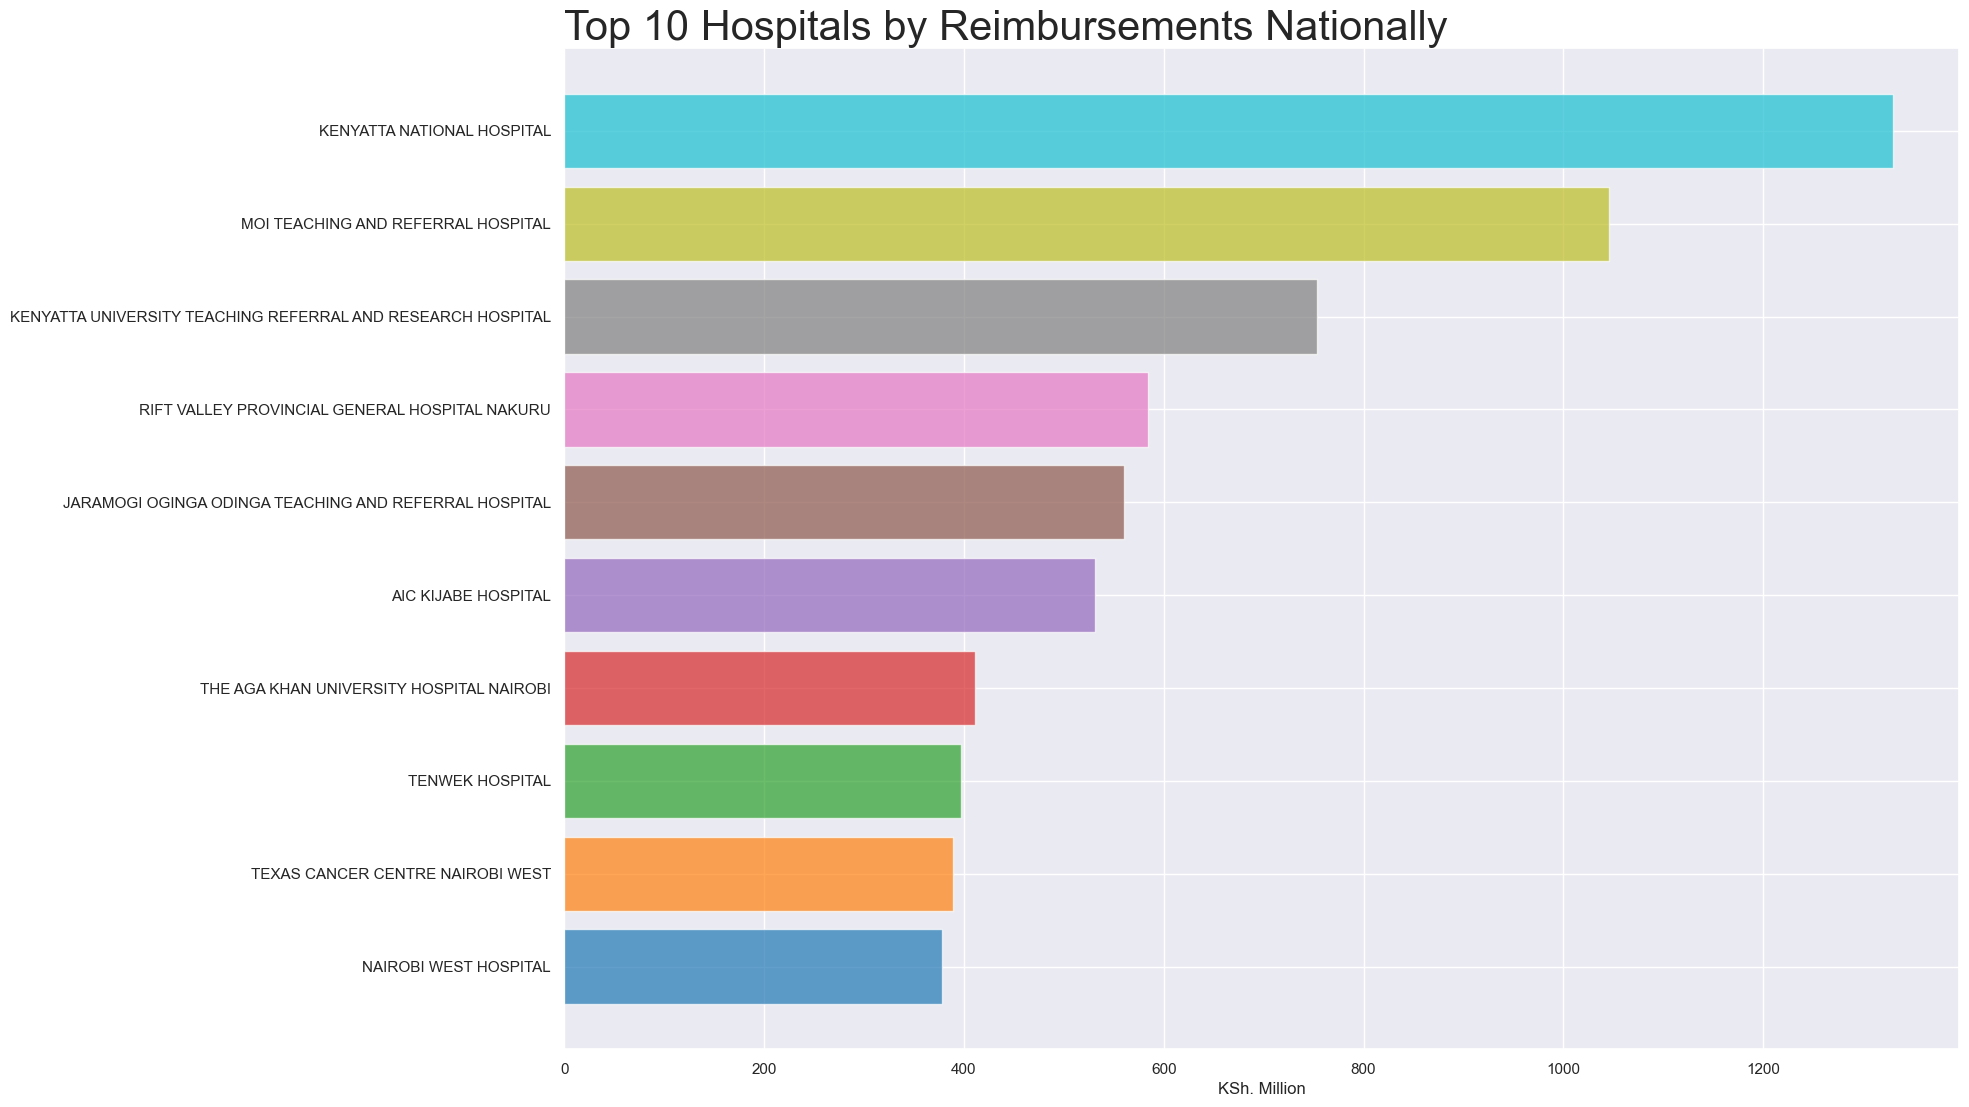

In [31]:
# Visualize top10 by reimbursements national
sns.set()

top10 = top10_national.copy()
top10 = top10.sort_values(by='total')
top10['total'] = top10['total'] / 1e6
colors = [color for color in plt.cm.tab10.colors]

plt.figure(figsize=(18,13))
plt.barh('provider', 'total', data=top10, color=colors, alpha=0.7)
plt.title("Top 10 Hospitals by Reimbursements Nationally", fontsize=30, loc='left')
plt.xlabel("KSh. Million")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [32]:
# Level 6 reimbursments
l6 = payments_processed[payments_processed['level'].str.contains('6', regex=False, na=False)][[
    'provider', 'facility_type', 'total']].sort_values(by='total',ascending = False).\
        reset_index(drop = True)
l6

,provider,facility_type,total
0,KENYATTA NATIONAL HOSPITAL,NATIONAL TEACHING AND REFERRAL HOSPITAL,"1,329,798,446.00"
1,MOI TEACHING AND REFERRAL HOSPITAL,NATIONAL TEACHING AND REFERRAL HOSPITAL,"1,045,749,887.03"
2,KENYATTA UNIVERSITY TEACHING REFERRAL AND RESE...,NATIONAL TEACHING AND REFERRAL HOSPITAL,"753,682,487.02"
3,JARAMOGI OGINGA ODINGA TEACHING AND REFERRAL H...,NATIONAL TEACHING AND REFERRAL HOSPITAL,"560,126,696.00"
4,THE AGA KHAN UNIVERSITY HOSPITAL NAIROBI,SPECIALIZED TERTIARY REFERRAL HOSPITAL,"410,693,083.68"
5,NAIROBI WEST HOSPITAL,SPECIALIZED TERTIARY REFERRAL HOSPITAL,"378,339,192.53"
6,THE NAIROBI HOSPITAL,SPECIALIZED TERTIARY REFERRAL HOSPITAL,"248,104,649.00"
7,COPTIC HOSPITAL - NGONG ROAD,NATIONAL TEACHING AND REFERRAL HOSPITAL,"222,731,519.00"
8,MP SHAH HOSPITAL,SPECIALIZED TERTIARY REFERRAL HOSPITAL,"185,830,951.00"
9,THE MATER HOSPITAL,FAITH BASED SPECIALIZED TERTIARY REFERRAL HOSP...,"117,344,082.60"


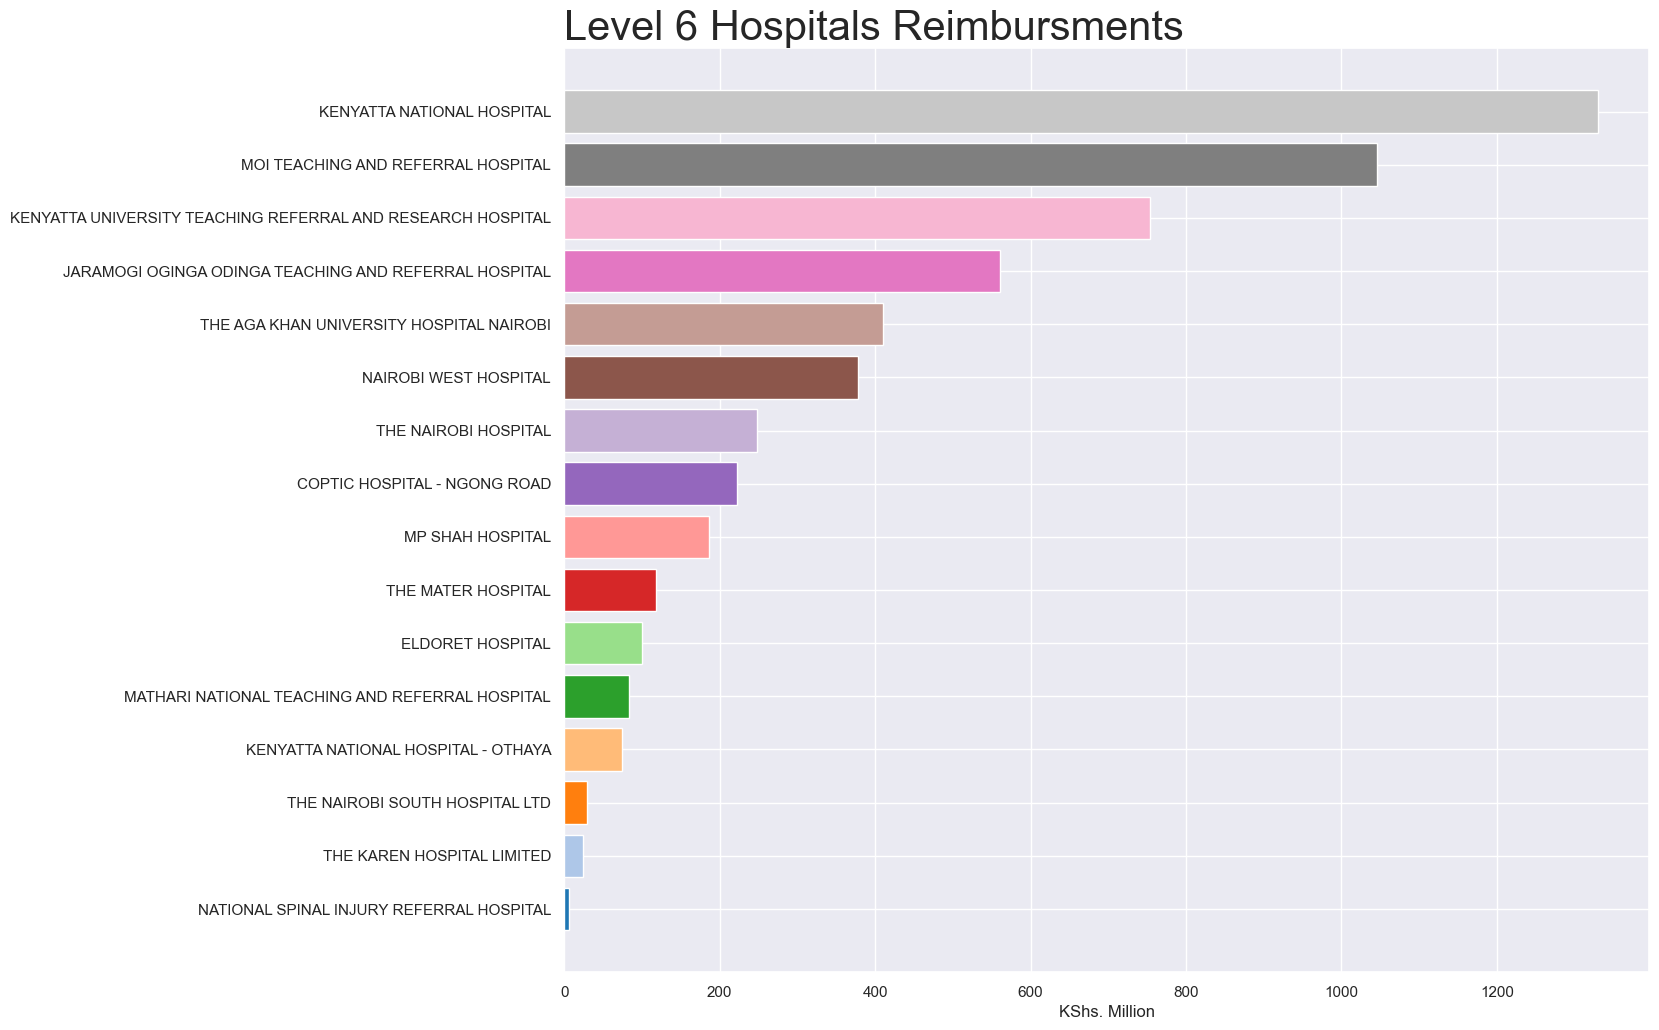

In [33]:
# Visualize Level 6  reimbursements 
level6 = l6.copy()
level6['total'] = level6['total']/1e6
level6 = level6.sort_values(by='total')
colors = [c for c in plt.cm.tab20.colors[:16]]

plt.figure(figsize=(14,12))
plt.barh('provider', 'total', data= level6, color=colors)
plt.title("Level 6 Hospitals Reimbursments", fontsize=30, loc='left')
plt.xlabel("KShs. Million")
plt.show()


In [34]:
# Level 5
top10l5 = payments_processed[payments_processed['level'] =='LEVEL 5'][[
    'provider', 'facility_type', 'total']].sort_values(by='total',ascending = False).\
        reset_index(drop = True).head(10)
top10l5

,provider,facility_type,total
0,RIFT VALLEY PROVINCIAL GENERAL HOSPITAL NAKURU,HOSPITAL LEVEL 5,"584,118,566.00"
1,AIC KIJABE HOSPITAL,FAITH BASED LEVEL 5 HOSPITAL,"530,732,791.00"
2,TENWEK HOSPITAL,FAITH BASED LEVEL 5 HOSPITAL,"396,820,678.34"
3,COAST GENERAL TEACHING AND REFERRAL HOSPITAL,Hospital Level 5,"293,614,837.00"
4,NORTH KINANGOP CATHOLIC HOSPITAL,FAITH BASED LEVEL 5 HOSPITAL,"265,675,505.00"
5,JUMUIA HOSPITAL HURUMA,FAITH BASED LEVEL 5 HOSPITAL,"238,781,496.00"
6,KISII TEACHING AND REFERRAL HOSPITAL,Hospital Level 5,"237,592,099.00"
7,ST. THERESA MISSION HOSPITAL KIIRUA,FAITH BASED LEVEL 5 HOSPITAL,"224,336,984.86"
8,PCEA CHOGORIA HOSPITAL,FAITH BASED LEVEL 5 HOSPITAL,"212,212,236.00"
9,P.C.E.A KIKUYU HOSPITAL,FAITH BASED LEVEL 5 HOSPITAL,"197,684,349.00"


In [35]:
# Level 4
top10l4 = payments_processed[payments_processed['level'].str.contains('4', regex=False, na=False)][[
    'provider', 'facility_type', 'total']].sort_values(by='total',ascending = False).\
        reset_index(drop = True).head(10)
top10l4

,provider,facility_type,total
0,TEXAS CANCER CENTRE NAIROBI WEST,HOSPITAL LEVEL 4,"388,798,834.00"
1,MERU DOCTORS PLAZA LIMITED,HOSPITAL LEVEL 4,"372,024,145.68"
2,ELDORET ONCOLOGY ASSOCIATES,HOSPITAL LEVEL 4,"184,251,294.00"
3,LADNAN HOSPITAL,HOSPITAL LEVEL 4,"180,482,217.26"
4,CANCER CARE KENYA LIMITED-UAP OLD MUTUAL TOWER,HOSPITAL LEVEL 4,"173,709,357.00"
5,LIFECARE HOSPITAL-ELDORET LIMITED,HOSPITAL LEVEL 4,"165,331,834.88"
6,KITUI COUNTY REFERRAL HOSPITAL,HOSPITAL LEVEL 4,"147,881,859.89"
7,CANCER CARE KENYA LIMITED,SPECIALIZED TREATMENT CENTRE (LEVEL 4B),"146,738,884.00"
8,NYAHURURU COUNTY REFERRAL HOSPITAL,HOSPITAL LEVEL 4,"135,975,171.69"
9,POPE BENEDICT XVI HOSPITAL,FAITH BASED LEVEL 4 HOSPITAL,"135,210,521.66"


In [36]:
# Level 3
top10l3 = payments_processed[payments_processed['level'].str.contains('3', regex=False, na=False)][[
    'provider', 'facility_type', 'level','total']].sort_values(by='total',ascending = False).\
        reset_index(drop=True).head(10)
top10l3

,provider,facility_type,level,total
0,RAPHA DIALYSIS AND DIAGNOSTIC CENTRE,MEDICAL CENTRE,LEVEL 3B,"76,653,219.36"
1,TENWEK HOSPITAL ANNEX BOMET,FAITH-BASED BASIC CENTRE,LEVEL 3B,"67,177,072.00"
2,FAIRMONT HOSPITAL,NURSING HOME,LEVEL 3A,"66,180,841.00"
3,MEDLIFE HEALTHCARE LIMITED,MEDICAL CENTRE,LEVEL 3B,"61,988,993.44"
4,FIGO CARE PLUS(K) LIMITED,NURSING HOME,LEVEL 3A,"51,258,450.00"
5,HAVEN HEALTHCARE,NURSING HOME,LEVEL 3A,"50,079,818.68"
6,OSCAR SPECIALIST HOSPITAL LIMITED,MEDICAL CENTRE,LEVEL 3B,"49,915,917.00"
7,MOMBASA CANCER CENTRE,NURSING HOME,LEVEL 3A,"45,906,010.00"
8,NEPHROCARE CLINIC LIMITED,NURSING HOME,LEVEL 3A,"42,600,000.00"
9,ADVANCED CANCER CENTRE LTD,NURSING HOME,LEVEL 3A,"39,663,690.00"


In [37]:
# Level 2
top10l2 = payments_processed[payments_processed['level'].str.contains('2', regex=False, na=False)][[
    'provider', 'facility_type', 'level','total']].sort_values(by='total',ascending = False).\
        reset_index(drop=True).head(10)
top10l2

,provider,facility_type,level,total
0,ST JOSEPH\'S MISSION HOSPITAL RIAT,MEDICAL CLINIC,LEVEL 2,"87,309,197.33"
1,CONSOLATA MATHARI TOWN ANNEX,DISPENSARY,LEVEL 2,"54,273,528.69"
2,SOMCARE HOSPITAL LTD,MEDICAL CLINIC,LEVEL 2,"36,426,362.00"
3,NYANDIWA BAPTIST CHURCH DISPENSARY,FAITH BASED DISPENSARY,LEVEL 2,"26,396,866.00"
4,EAGLE HEALTHCARE SOLUTIONS,MEDICAL CLINIC,LEVEL 2,"22,529,802.51"
5,GUCHA COTTAGE MATERNITY & NURSING HOME LTD,MEDICAL CLINIC,LEVEL 2,"22,449,380.00"
6,LADOPHARMA MEDICAL CENTRE,MEDICAL CLINIC,LEVEL 2,"21,879,080.00"
7,ST.LUCIA HEALTH CLINIC,MEDICAL CLINIC,LEVEL 2,"19,725,671.36"
8,LAMHEAL MATERNITY AND NURSING HOME,MEDICAL CLINIC,LEVEL 2,"18,247,567.79"
9,NAJRAN MEDICAL CENTRE LIMITED,MEDICAL CLINIC,LEVEL 2,"15,851,460.00"


In [38]:
# Rename provider levels and allocate ownership categories
def map_provider_level(level):
    """ 
    Map provider categories as 2,3,4,5, and 6
    Args (str): Provider level
    Returns (str): Mapped provider level

    """
    if level.count('2') > 0:
        return 'LEVEL 2' 
    elif level.count('3') > 0:
        return 'LEVEL 3' 
    elif level.count('4') > 0:
        return 'LEVEL 4' 
    elif level.count('5') > 0:
        return 'LEVEL 5' 
    else:
        return 'LEVEL 6'

# Provider ownership
def public_private(reg_no):
    """ 
    Map provider ownership as public (national or county government) and 
    private(faith-based, for-profit, not-for-profit)
    Args (str): Provider registration number
    Returns (str): Provider ownership

    """
    if 'GK' in reg_no:
        return 'public'
    return 'private'

payments = payments_processed.dropna()
payments['level_renamed'] = payments['level'].map(map_provider_level)
payments['ownership'] = payments['reg_no'].map(public_private)

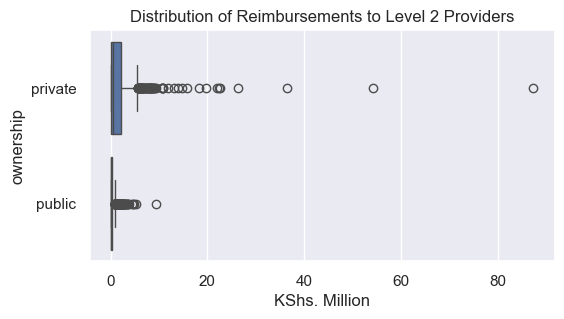

In [39]:
# Reimbursement distributions level 2
l2_payments = payments[payments['level_renamed']=='LEVEL 2']
l2_payments['total'] = l2_payments['total']/1e6
plt.figure(figsize=(6,3))
sns.boxplot(x=l2_payments['total'], y= l2_payments['ownership'], 
            hue=l2_payments['ownership'])
plt.title("Distribution of Reimbursements to Level 2 Providers", fontsize=12)
plt.xlabel("KShs. Million")
plt.show()

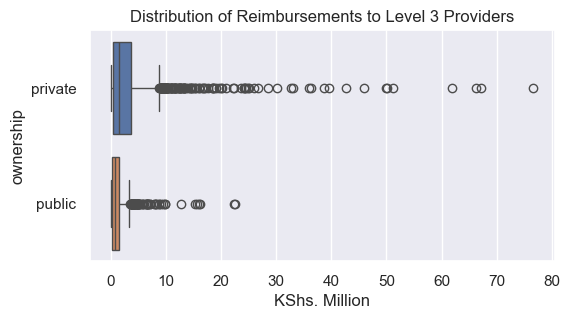

In [40]:
# Reimbursement distribution level 3
l3_payments = payments[payments['level_renamed'] == 'LEVEL 3']
l3_payments['total'] = l3_payments['total']/1e6

plt.figure(figsize=(6,3))
sns.boxplot(data = l3_payments, x='total', y='ownership', hue='ownership' )
plt.title("Distribution of Reimbursements to Level 3 Providers", fontsize=12)
plt.xlabel("KShs. Million")
plt.show()

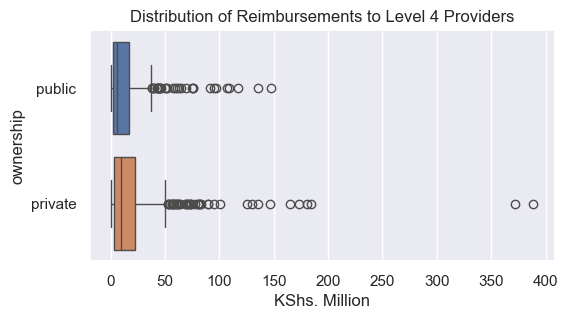

In [41]:
# Reimbursement distribution level 4
l4_payments = payments[payments['level_renamed'] == 'LEVEL 4']
l4_payments['total'] = l4_payments['total']/1e6

plt.figure(figsize=(6,3))
sns.boxplot(data = l4_payments, x='total', y='ownership', hue='ownership' )
plt.title("Distribution of Reimbursements to Level 4 Providers", fontsize=12)
plt.xlabel("KShs. Million")
plt.show()

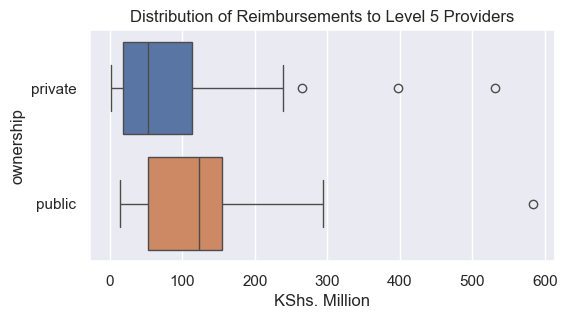

In [42]:
# Reimbursement distribution level 5
l5_payments = payments[payments['level_renamed'] == 'LEVEL 5']
l5_payments['total'] = l5_payments['total']/1e6

plt.figure(figsize=(6,3))
sns.boxplot(data = l5_payments, x='total', y='ownership', hue='ownership' )
plt.title("Distribution of Reimbursements to Level 5 Providers", fontsize=12)
plt.xlabel("KShs. Million")
plt.show()

In [43]:
# Reimbursments percent: Public facilities (all)
round(payments_processed[payments_processed['reg_no'].str.contains('[GK]', flags=re.IGNORECASE,
                        na=False)]['total'].sum()/ payments_processed['total'].sum() *100 , 2)

33.62

In [44]:
# Reimbusements percent: Public facilities levels 2 and 3
round(payments_processed[(payments_processed['reg_no'].str.contains('[GK]', flags=re.IGNORECASE, 
            na=False)) & (payments_processed['level'].str.contains('[2|3]', na=False))]['total'].sum()\
            / payments_processed[(payments_processed['level'].str.contains('[2|3]', na=False))]
            ['total'].sum() *100, 2)

20.31

In [45]:
# Top 10 level 2 and 3
top50_l2_l3 = payments_processed[(payments_processed['level'].str.contains(
    '[2|3]', na=False))].sort_values(by='total', ascending=False )\
     .reset_index(drop=True).head(10)[['provider', 'facility_type', 'level', 
                                       'total']]
top50_l2_l3

,provider,facility_type,level,total
0,ST JOSEPH\'S MISSION HOSPITAL RIAT,MEDICAL CLINIC,LEVEL 2,"87,309,197.33"
1,RAPHA DIALYSIS AND DIAGNOSTIC CENTRE,MEDICAL CENTRE,LEVEL 3B,"76,653,219.36"
2,TENWEK HOSPITAL ANNEX BOMET,FAITH-BASED BASIC CENTRE,LEVEL 3B,"67,177,072.00"
3,FAIRMONT HOSPITAL,NURSING HOME,LEVEL 3A,"66,180,841.00"
4,MEDLIFE HEALTHCARE LIMITED,MEDICAL CENTRE,LEVEL 3B,"61,988,993.44"
5,CONSOLATA MATHARI TOWN ANNEX,DISPENSARY,LEVEL 2,"54,273,528.69"
6,FIGO CARE PLUS(K) LIMITED,NURSING HOME,LEVEL 3A,"51,258,450.00"
7,HAVEN HEALTHCARE,NURSING HOME,LEVEL 3A,"50,079,818.68"
8,OSCAR SPECIALIST HOSPITAL LIMITED,MEDICAL CENTRE,LEVEL 3B,"49,915,917.00"
9,MOMBASA CANCER CENTRE,NURSING HOME,LEVEL 3A,"45,906,010.00"


In [46]:
# Top counties
counties = payments_processed.groupby('county')['total'].sum().reset_index().reset_index(drop=True).\
            sort_values(by='total', ascending = False).reset_index(drop = True)
# Top 10 counties
counties.head(10)

,county,total
0,NAIROBI,"8,148,610,326.58"
1,UASIN GISHU,"2,484,606,077.50"
2,KIAMBU,"2,025,194,495.48"
3,KISII,"2,013,565,978.49"
4,KISUMU,"1,811,105,574.01"
5,MERU,"1,599,831,625.24"
6,HOMA BAY,"1,523,124,952.90"
7,NAKURU,"1,446,706,695.86"
8,MOMBASA,"1,325,780,535.03"
9,MANDERA,"1,286,655,908.56"


In [47]:
# Load projected county population 2025 (KNBS)
pop = pd.read_csv(r"C:\Users\user\Desktop\SHA Payments\csv\kenya_projected population_knbs.csv",
                  usecols = ['county', 'pop_2025'])
pop.head()

,county,pop_2025
0,Mombasa,1367714
1,Kwale,988056
2,Kilifi,1636510
3,Tana River,370332
4,Lamu,175705


In [48]:
# Reimbursements per capita
pop['county'] = pop['county'].str.upper()
# Merge reimbursements and population
counties_pop = counties.merge(pop, on = 'county', how='left')
# Per capita reimbursements
counties_pop['per_capita'] = round(counties_pop['total'] / counties_pop['pop_2025'],2)
# Top per capita
counties_pop.sort_values(by='per_capita', ascending=False).reset_index(drop=True)


,county,total,pop_2025,per_capita
0,UASIN GISHU,"2,484,606,077.50",1306864,"1,901.20"
1,NAIROBI,"8,148,610,326.58",4906355,"1,660.83"
2,KISII,"2,013,565,978.49",1370372,"1,469.36"
3,KIRINYAGA,"974,419,385.75",663760,"1,468.03"
4,KISUMU,"1,811,105,574.01",1290016,"1,403.94"
5,MANDERA,"1,286,655,908.56",1007207,"1,277.45"
6,HOMA BAY,"1,523,124,952.90",1278183,"1,191.63"
7,NYERI,"882,653,092.16",852614,"1,035.23"
8,THARAKA NITHI,"431,779,649.06",425238,"1,015.38"
9,EMBU,"663,190,264.42",661690,"1,002.27"


In [49]:
# Drill down reimbursements in counties
# Top earners by county
top10_makueni = payments_processed[payments_processed['county'] == 'MAKUENI'].sort_values(by='total',
                    ascending = False)[['provider', 'facility_type', 'level', 'total']].reset_index(
                        drop = True).head(10)
top10_makueni

,provider,facility_type,level,total
0,MAKUENI COUNTY REFERRAL HOSPITAL,HOSPITAL LEVEL 5,LEVEL 5,"132,490,000.89"
1,ROYALSTAR FAMILY HOSPITAL LIMITED,HOSPITAL LEVEL 4,LEVEL 4,"31,918,702.04"
2,MAKINDU SUB-COUNTY HOSPITAL,HOSPITAL LEVEL 4,LEVEL 4,"29,527,761.00"
3,KIBWEZI SUB COUNTY HOSPITAL,HOSPITAL LEVEL 4,LEVEL 4,"25,422,448.83"
4,RAPHA MAKUENI NURSING HOME,HOSPITAL LEVEL 4,LEVEL 4,"23,566,830.00"
5,EAGLE HEALTHCARE SOLUTIONS,MEDICAL CLINIC,LEVEL 2,"22,529,802.51"
6,SULTAN HAMUD SUB COUNTY HOSPITAL,HOSPITAL LEVEL 4,LEVEL 4,"16,911,773.03"
7,MAKINDU MEDICAL CENTRE,HOSPITAL LEVEL 4,LEVEL 4,"15,312,443.08"
8,TAWA SUB-COUNTY HOSPITAL,HOSPITAL LEVEL 4,LEVEL 4,"13,635,875.21"
9,THE MAKUENI DOCTORS PLAZA LIMITED,HOSPITAL LEVEL 4,LEVEL 4,"12,576,961.88"


In [50]:
# Top earners by county and facility level: Level 4
payments_processed[(payments_processed['county'] == 'UASIN GISHU') & (payments_processed[
    'level'].str.contains('4', regex = False, na = False))].sort_values(by='total',
                    ascending = False)[['provider', 'facility_type', 'level', 'total']].head(10)

,provider,facility_type,level,total
1113,ELDORET ONCOLOGY ASSOCIATES,HOSPITAL LEVEL 4,LEVEL 4,"184,251,294.00"
2863,LIFECARE HOSPITAL-ELDORET LIMITED,HOSPITAL LEVEL 4,LEVEL 4,"165,331,834.88"
2896,LIVING ROOM INTERNATIONAL,HOSPITAL LEVEL 4,LEVEL 4,"81,143,565.00"
4227,OAK TREE CENTRE FOR KIDNEY & CHRONIC DISEASES LTD,SPECIALIZED TREATMENT CENTRE (LEVEL 4B),LEVEL 4B,"62,199,871.60"
722,CEDAR HOSPITAL,HOSPITAL LEVEL 4,LEVEL 4,"47,297,567.48"
1514,GRAND ROYALCARE MEDICAL LIMITED,HOSPITAL LEVEL 4,LEVEL 4,"38,181,120.00"
5181,ST. BRIGITTAS CATHOLIC HOSPITAL,FAITH BASED LEVEL 4 HOSPITAL,LEVEL 4,"34,815,577.00"
4408,PALMCARE SINAI HOSPITAL,HOSPITAL LEVEL 4,LEVEL 4,"24,576,474.21"
1108,ELDO EYE CENTER LIMITED,SPECIALIZED TREATMENT CENTRE (LEVEL 4B),LEVEL 4B,"24,274,152.00"
3124,MAMA RACHEL RUTO MATERNITY HOSPITAL,HOSPITAL LEVEL 4,LEVEL 4,"20,076,707.15"


In [51]:
# Top earners by county and facility level: Level 3
payments_processed[(payments_processed['county'] == 'KIRINYAGA') & (payments_processed[
    'level'].str.contains('3', regex = False, na = False))].sort_values(by = 'total',
                    ascending = False)[['provider', 'facility_type', 'level', 'total']].head(10)

,provider,facility_type,level,total
3381,MEDLIFE HEALTHCARE LIMITED,MEDICAL CENTRE,LEVEL 3B,"61,988,993.44"
905,COMRADE NURSING HOME,NURSING HOME,LEVEL 3A,"8,730,869.31"
3788,MWEA COUNTY MEDICAL CENTRE,NURSING HOME,LEVEL 3A,"8,546,919.92"
4925,SHAMMAH NURSING HOME LIMITED,NURSING HOME,LEVEL 3A,"8,015,660.50"
2188,KARUMANDI MEDICAL CENTRE,MEDICAL CENTRE,LEVEL 3B,"6,973,039.69"
1939,KAGUMO VISION MEDICAL CENTRE ANNEX,MEDICAL CENTRE,LEVEL 3B,"6,309,055.34"
2314,KERUGOYA FORTIS MEDICAL AND CANCER CENTRE TOWN...,MEDICAL CENTRE,LEVEL 3B,"6,058,350.00"
4980,SIGMA MEDICAL CENTRE KIANYAGA,NURSING HOME,LEVEL 3A,"5,755,171.52"
3713,MURURI MEDICAL CENTRE LTD,NURSING HOME,LEVEL 3A,"5,116,478.72"
4116,NUCLEAR MEDICAL AND DIAGNOSTIC CLINIC,NURSING HOME,LEVEL 3A,"4,672,122.33"


In [52]:
# Top earners by county and facility level: Level 2
payments_processed[(payments_processed['county'] == 'NAIROBI') & (payments_processed[
    'level'].str.contains('2', regex = False, na = False))].sort_values(by='total',
                    ascending = False)[['provider', 'facility_type', 'level', 'total']].head(30)

,provider,facility_type,level,total
4886,SEMA HOMECARE LIMITED,MEDICAL CLINIC,LEVEL 2,"7,873,956.81"
1656,HURUMA NELLY MEDICARE CENTRE,MEDICAL CLINIC,LEVEL 2,"5,778,583.90"
3524,MMM MUKURU HEALTH CENTRE,DISPENSARY,LEVEL 2,"4,997,752.57"
2266,KAYOLE SOWETO DISPENSARY,DISPENSARY,LEVEL 2,"4,906,068.71"
2748,KWARE DISPENSARY,DISPENSARY,LEVEL 2,"3,474,498.18"
3513,MJI WA HURUMA DISPENSARY,DISPENSARY,LEVEL 2,"2,711,255.98"
1382,GATINA DISPENSARY,DISPENSARY,LEVEL 2,"2,584,948.14"
4745,RUARAKA DISPENSARY,DISPENSARY,LEVEL 2,"2,222,329.46"
4505,PRIME HEALTH SERVICES - KAHAWA WEST,MEDICAL CLINIC,LEVEL 2,"2,035,565.11"
3836,NAIROBI HOMES MEDICAL CLINIC,MEDICAL CLINIC,LEVEL 2,"1,665,440.00"


### Nairobi

Public facilities percent share of reimbursements (Level 6 inclusive): 33.69
Public facilities percent share of reimbursements (Level 6 excluded): 13.13


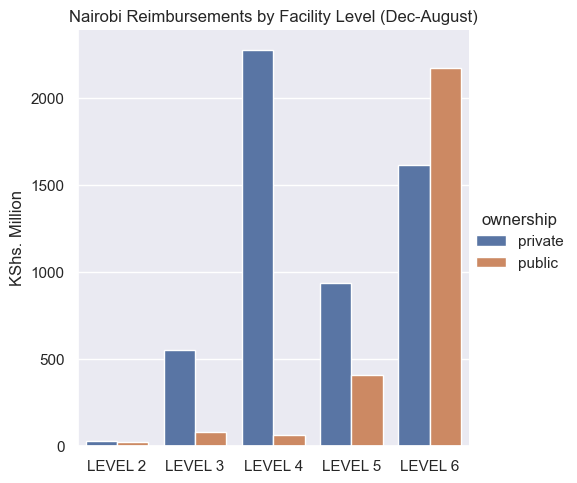

In [53]:
# Filter Nairobi facilities
nairobi = payments_processed.query("county == 'NAIROBI'")
nairobi['ownership'] = nairobi['reg_no'].map(public_private)
nairobi['level_renamed'] = nairobi['level'].map(map_provider_level)
# Group Payments by ownership and level
nairobi_grouped = nairobi.groupby(['ownership', 'level_renamed'])['total'].sum().reset_index()
print("Public facilities percent share of reimbursements (Level 6 inclusive):",
      (nairobi_grouped.query("ownership == 'public'")['total'].sum()/
      nairobi_grouped['total'].sum() *100).round(2)) 
print("Public facilities percent share of reimbursements (Level 6 excluded):",
      (nairobi_grouped.query("ownership == 'public' and level_renamed != 'LEVEL 6'")
       ['total'].sum()/
      nairobi_grouped.query("level_renamed != 'LEVEL 6'")['total'].sum() *100).round(2))

# Visualize Nairobi reimbursements by facility level
nairobi_grouped['total'] = nairobi_grouped['total']/ 1e6

sns.catplot(data=nairobi_grouped, kind='bar', x='level_renamed', y='total',
            hue='ownership')
plt.title("Nairobi Reimbursements by Facility Level (Dec-August)")
plt.ylabel("KShs. Million")
plt.xlabel("")
plt.show()


In [54]:
nairobi_grouped

,ownership,level_renamed,total
0,private,LEVEL 2,25.73
1,private,LEVEL 3,549.29
2,private,LEVEL 4,"2,279.31"
3,private,LEVEL 5,933.77
4,private,LEVEL 6,"1,615.57"
5,public,LEVEL 2,23.84
6,public,LEVEL 3,80.42
7,public,LEVEL 4,61.14
8,public,LEVEL 5,407.15
9,public,LEVEL 6,"2,172.38"


### Kirinyaga

Public facilities percent share of reimbursements: 33.69


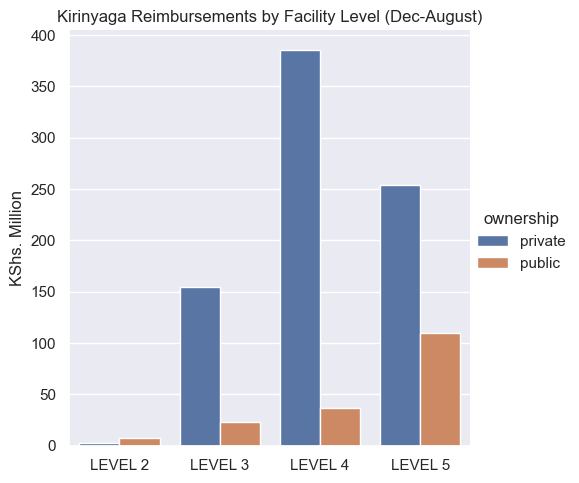

In [55]:
# Kirinyaga
kirinyaga = payments_processed.query("county == 'KIRINYAGA'")
kirinyaga['ownership'] = kirinyaga['reg_no'].map(public_private)
kirinyaga['level_renamed'] = kirinyaga['level'].map(map_provider_level)
# Group Payments by ownership and level
kirinyaga_grouped = kirinyaga.groupby(['ownership', 'level_renamed'])['total'].sum().reset_index()
print("Public facilities percent share of reimbursements:",
      (nairobi_grouped.query("ownership == 'public'")['total'].sum()/
      nairobi_grouped['total'].sum() *100).round(2)) 

# Visualize Kirinyaga reimbursements by facility level
kirinyaga_grouped['total'] = kirinyaga_grouped['total']/ 1e6

sns.catplot(data=kirinyaga_grouped, kind='bar', x='level_renamed', y='total',
            hue='ownership')
plt.title("Kirinyaga Reimbursements by Facility Level (Dec-August)")
plt.ylabel("KShs. Million")
plt.xlabel("")
plt.show()

### Makueni

Public facilities percent share of reimbursements: 68.65


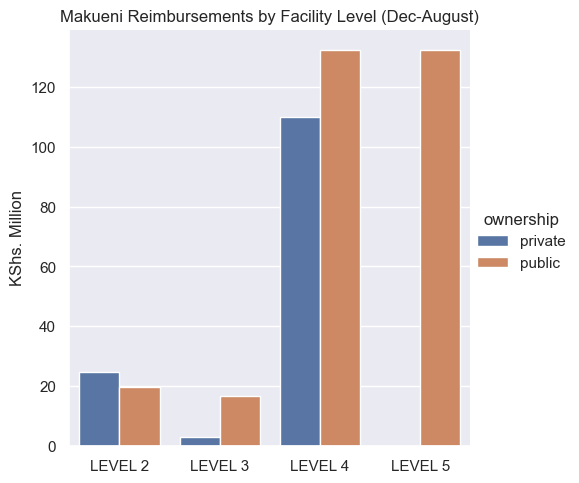

In [56]:
# Makueni private-public mix 
makueni = payments_processed.query("county == 'MAKUENI'")
makueni['ownership'] = makueni['reg_no'].map(public_private)
makueni['level_renamed'] = makueni['level'].map(map_provider_level)
# Group Payments by ownership and level
makueni_grouped = makueni.groupby(['ownership', 'level_renamed'])['total'].sum().reset_index()
print("Public facilities percent share of reimbursements:",
      (makueni_grouped.query("ownership == 'public'")['total'].sum()/
      makueni_grouped['total'].sum() *100).round(2)) 

# Visualize Makueni reimbursements by facility level
makueni_grouped['total'] = makueni_grouped['total']/ 1e6

sns.catplot(data=makueni_grouped, kind='bar', x='level_renamed', y='total',
            hue='ownership')
plt.title("Makueni Reimbursements by Facility Level (Dec-August)")
plt.ylabel("KShs. Million")
plt.xlabel("")
plt.show()


### Nyeri

Public facilities percent share of reimbursements: 28.28


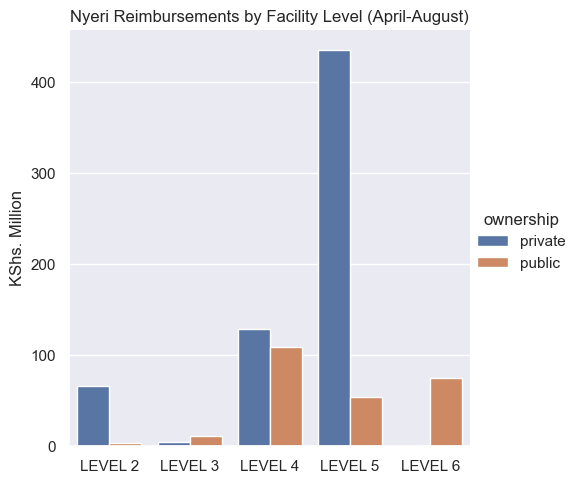

In [57]:
# Nyeri
nyeri = payments_processed.query("county == 'NYERI'")
nyeri['ownership'] = nyeri['reg_no'].map(public_private)
nyeri['level_renamed'] = nyeri['level'].map(map_provider_level)
# Group Payments by ownership and level
nyeri_grouped = nyeri.groupby(['ownership', 'level_renamed'])['total'].sum().reset_index()
print("Public facilities percent share of reimbursements:",
      (nyeri_grouped.query("ownership == 'public'")['total'].sum()/
      nyeri_grouped['total'].sum() *100).round(2)) 

# Visualize Nyeri reimbursements by facility level
nyeri_grouped['total'] = nyeri_grouped['total']/ 1e6

sns.catplot(data=nyeri_grouped, kind='bar', x='level_renamed', y='total',
            hue='ownership')
plt.title("Nyeri Reimbursements by Facility Level (April-August)")
plt.ylabel("KShs. Million")
plt.xlabel("")
plt.show()